In [33]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



## Input dataset from the website biostat

In [34]:
titan = pd.read_csv("https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic.txt")

## Checked dataset and select the top 15 data
- 1 is survived

In [35]:
titan.head(15)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


## Checked how many data in the dataset

In [29]:
titan.shape

(1313, 11)

## Drawn a histogram plot in order to check the survival distribution of age

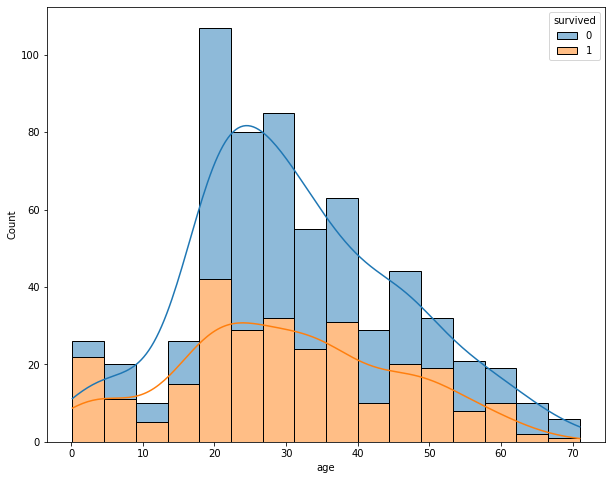

In [7]:
plt.figure(figsize=(10,8))
sns.histplot(data=titan, x= "age", hue= "survived", kde= True, multiple= "stack")
plt.show()

## Drawn a heatmap to illustrate the correlation between different variables (row name, survival and age)

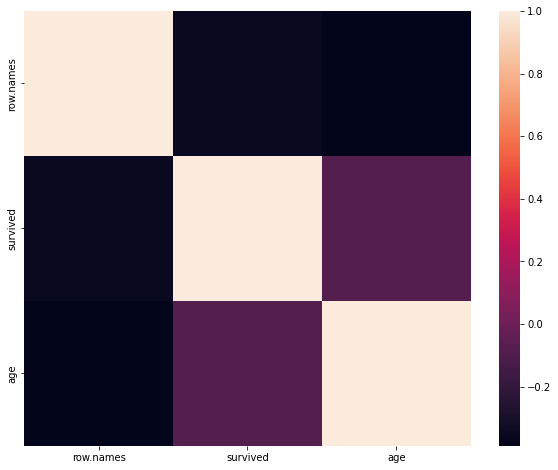

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(titan.corr())
plt.show()

## Replaced the omitted data by the mean 

In [36]:
titan["age"].fillna(titan['age'].mean(), inplace=True)

## Checked the dataset

In [13]:
titan.head(15)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.000000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.916700,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.000000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.000000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.000000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.000000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.000000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


## Drawn a histogram plot in order to check the survival distribution of age

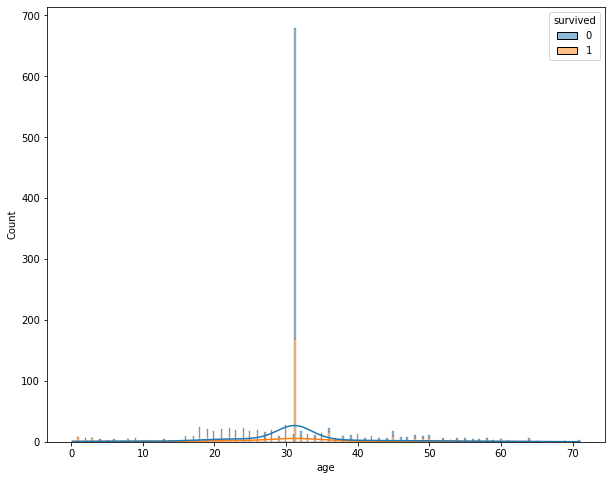

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=titan, x= "age", hue= "survived", kde= True, multiple= "stack")
plt.show()

## Celected the column "pclass", "age" and "sex" as independent variables and survived as the dependent variable

In [37]:
x = titan[["pclass", "age", "sex"]]
y = titan["survived"]

## Randomly seperated the dataset into a training dataset and a test dataset
- the ratio between the training dataset and the test dataset is 4:1

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=22, test_size=0.2)

In [143]:
# x_train = x_train.to_dict(orient="records")
# x_test = x_test.to_dict(orient="records")

## Converted the colume "pclass" into 3 columns as 1st, 2nd and 3rd
- If the pclass is the first class, the columes should be 1, 0 and 0
- Moreover, if the pclass is the second class, the columes should be 0, 1 and 0

In [38]:
transfer = DictVectorizer(sparse=False)


In [39]:
x_train = transfer.fit_transform(x_train.to_dict(orient="records"))
x_test = transfer.fit_transform(x_test.to_dict(orient="records"))

## Applied decision tree classifier to build up a model

- Applied cart in order to adjust hyperparameters. in this case, the depth of the decision tress is less than 6
- The default citerion is gini index rather than entropy

In [22]:
estimator = DecisionTreeClassifier(max_depth=5)
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

## Based on the training dataset and decisiontressclassifier model to create an estimator
 - Based the model, we try to predict the result

In [23]:
y_pre = estimator.predict(x_test)

In [15]:
y_pre

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

## Compared with predicted result and the test dataset
 - The score: 0.798

In [24]:
ret = estimator.score(x_test, y_test)

print(ret)

0.7984790874524715


## Saved the estimator

In [17]:
filename = 'decisionTree.sav'
pickle.dump(estimator, open(filename, 'wb'))

## Tested the saved ML model

In [18]:
load_model = pickle.load(open(filename, 'rb'))

## Created the image of the decision tree 

In [25]:
export_graphviz(estimator, out_file="./tree.dot", feature_names=['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'woman', 'man'])

## Optimization: apply begging, random forest and cross-validation

- The bootstrap method (begging) for estimating statistical quantities from samples
- The bootstrap aggregation algorithm for creating multiple different models from a single training dataset. 
- The random forest algorithm that makes a small tweak to bagging and results in a very powerful classifer 

    In this case, we select 120, 200, 300, 500 and 800 items respectively. Meanwhile, the max depth is 5, 8, 15, 25 and 30 respectively. CV refers to a cross validation splitting strategy. In the other words, we use the predictions of one estimator as training data for another, to not overfit the training supervision. In this case, we use 3-fold

In [40]:
modelRandomForest = RandomForestClassifier()

param_grid = {"n_estimators": [120, 200, 300, 500, 800], "max_depth": [5, 8, 15, 25, 30]}
estimator = GridSearchCV(modelRandomForest, param_grid=param_grid, cv= 3)

estimator.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'n_estimators': [120, 200, 300, 500, 800]})

## Created the score of random forest estimator

In [41]:
estimator.score(x_test, y_test)

0.7908745247148289

In [42]:
estimator.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=120)

## Exported the best model of the random forest

In [44]:
filename = 'randomforest.sav'
pickle.dump(estimator.best_estimator_, open(filename, 'wb'))

## Tested the saved model

In [45]:
load_model = pickle.load(open(filename, 'rb'))

In [48]:
load_model.predict([[22, 0, 1, 0, 1, 0]])

array([1])